In [ ]:
!pip install quantecon

     |████████████████████████████████| 269 kB 6.3 MB/s 


In [ ]:
%matplotlib inline
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind, ttest_rel, sem
from statistics import mean
import quantecon as qe
from mpl_toolkits.mplot3d import Axes3D

Statistics vs Machine Learning — Linear Regression Example

slope: 0.84
y-intercept: 915.59


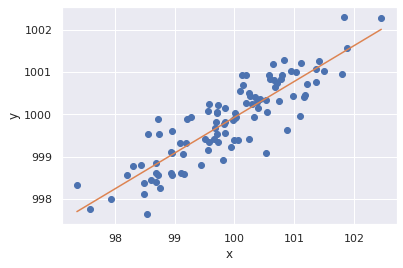

In [ ]:
rng = np.random.RandomState(123)
mean = [100, 1000]
cov = [[1, 0.9], [0.9, 1]]
sample = rng.multivariate_normal(mean, cov, size=100)
x, y = sample[:, 0], sample[:, 1]
w = np.polyfit(x, y, deg=1)
b, w1 = w[1], w[0]
print('slope: %.2f' % w1)
print('y-intercept: %.2f' % b)
extremes = np.array([np.min(x), np.max(x)])
predict = extremes*w1 + b

plt.plot(x, y, marker='o', linestyle='')
plt.plot(extremes, predict)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Qualitative Examples of Machine Learning Applications

Classification: Predicting discrete labels


In [ ]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()

In [ ]:
# Organize our data
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [ ]:
# Look at our data
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0])

['malignant' 'benign']
0
mean radius
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [ ]:
from sklearn.model_selection import train_test_split


# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB


# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

In [ ]:
# Make predictions
preds = gnb.predict(test)
print(preds)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.9414893617021277


Principal Component Analysis (PCA)

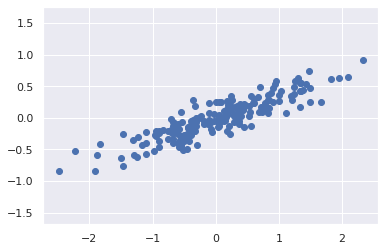

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


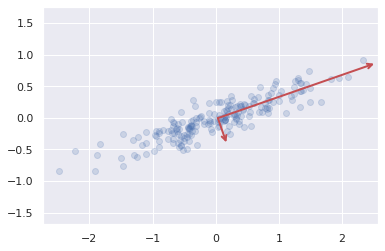

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, -pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

[(-3.0, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5.0, 5.0),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

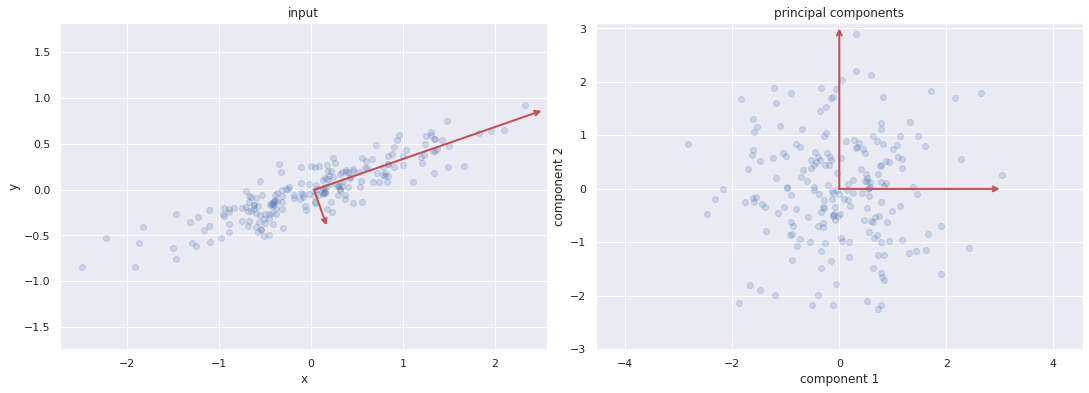

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, -pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))


Dimentionality reduction

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


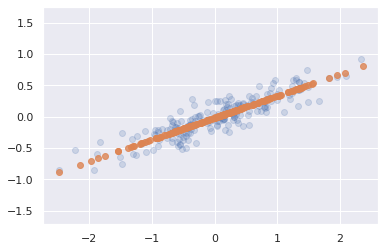

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

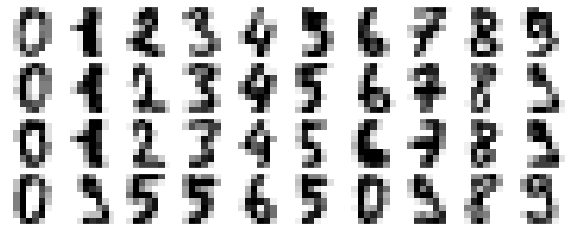

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


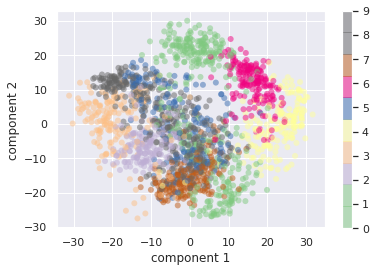

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Noise reduction

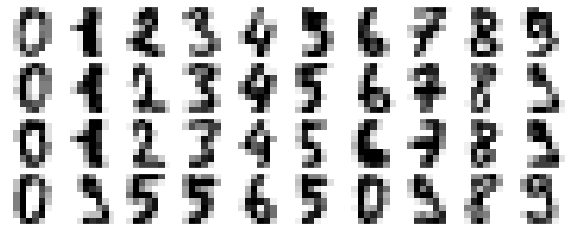

In [ ]:
plot_digits(digits.data)

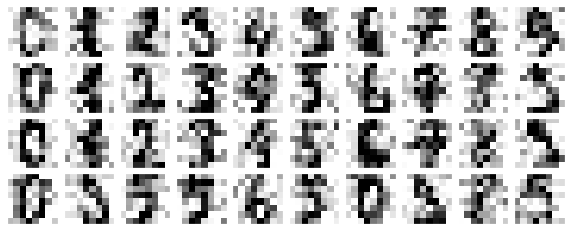

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

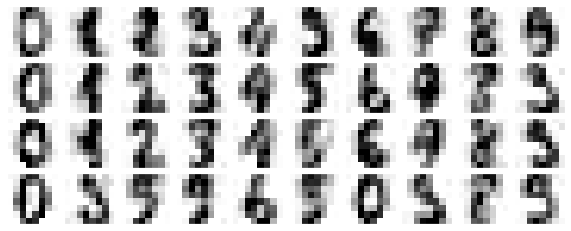

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Estimating how many components are needed

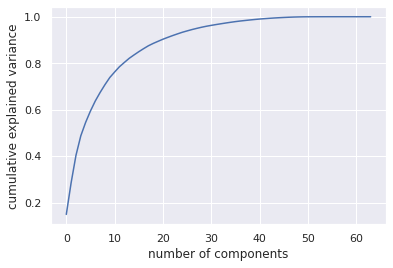

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Markov Chains

S = {s1, s2, ..., sn}

S = {s1, s2, s3}

{s1, s1, s1, s3, s3, s3, s2, s2, s3, s3, s3, s3, s1, ...}

p_init = (p1, p2, p3)

In [ ]:
p_init = np.array([1/3., 1/3., 1/3.])

In [ ]:
p_init = np.array([0, 1, 0])

In [ ]:
# State 0: 0.1 probability
# State 1: 0.8 probability
# State 2: 0.1 probability
p_init = np.array([0.1, 0.8, 0.1])

In [ ]:
p_transition = np.array(
    [[0.90, 0.05, 0.05],
     [0.01, 0.90, 0.09],
     [0.07, 0.03, 0.9]]
)
p_transition

array([[0.9 , 0.05, 0.05],
       [0.01, 0.9 , 0.09],
       [0.07, 0.03, 0.9 ]])

In [ ]:
assert p_transition[0, :].sum() == 1
assert p_transition[1, :].sum() == 1
assert p_transition[2, :].sum() == 1

In [ ]:
p_transition_example = np.array(
    [[0.6,  0.2, 0.2],
     [0.05, 0.9, 0.05],
     [0.1,  0.2, 0.7]]
)

In [ ]:
p_next = p_transition @ p_transition_example
p_next

array([[0.5475, 0.235 , 0.2175],
       [0.06  , 0.83  , 0.11  ],
       [0.1335, 0.221 , 0.6455]])

In [ ]:
p_next = p_next @ p_transition_example
p_next

array([[0.362 , 0.3645, 0.2735],
       [0.0885, 0.781 , 0.1305],
       [0.1557, 0.3547, 0.4896]])

In [ ]:
p_state_t = [p_init]

for i in range(200):  # 200 time steps, as we don't have infinite time :)
    p_state_t.append(p_state_t[-1] @ p_transition_example)

In [ ]:
state_distributions = pd.DataFrame(p_state_t)
state_distributions

,0,1,2
0,0.000000,1.000000,0.0000
1,0.050000,0.900000,0.0500
2,0.080000,0.830000,0.0900
3,0.098500,0.781000,0.1205
4,0.110200,0.746700,0.1431
...,...,...,...
196,0.133333,0.666667,0.2000
197,0.133333,0.666667,0.2000
198,0.133333,0.666667,0.2000
199,0.133333,0.666667,0.2000


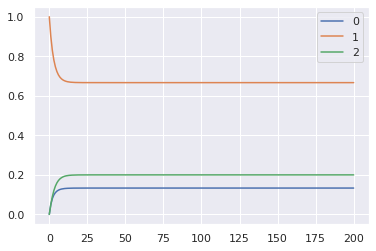

In [ ]:
state_distributions.plot();

In [ ]:
print(p_state_t[-1])

[0.13333333 0.66666667 0.2       ]


In [ ]:
def equilibrium_distribution(p_transition):
    n_states = p_transition.shape[0]
    A = np.append(
        arr=p_transition.T - np.eye(n_states),
        values=np.ones(n_states).reshape(1, -1),
        axis=0
    )
    b = np.transpose(np.array([0] * n_states + [1]))
    p_eq = np.linalg.solve(
        a=np.transpose(A).dot(A),
        b=np.transpose(A).dot(b)
    )
    return p_eq



print(equilibrium_distribution(p_transition_example))

[0.13333333 0.66666667 0.2       ]


Generating a Markov Sequence

In [ ]:
from scipy.stats import multinomial
from typing import List

def markov_sequence(p_init: np.array, p_transition: np.array, sequence_length: int) -> List[int]:
    """
    Generate a Markov sequence based on p_init and p_transition.
    """
    if p_init is None:
        p_init = equilibrium_distribution(p_transition)
    initial_state = list(multinomial.rvs(1, p_init)).index(1)

    states = [initial_state]
    for _ in range(sequence_length - 1):
        p_tr = p_transition[states[-1]]
        new_state = list(multinomial.rvs(1, p_tr)).index(1)
        states.append(new_state)
    return states


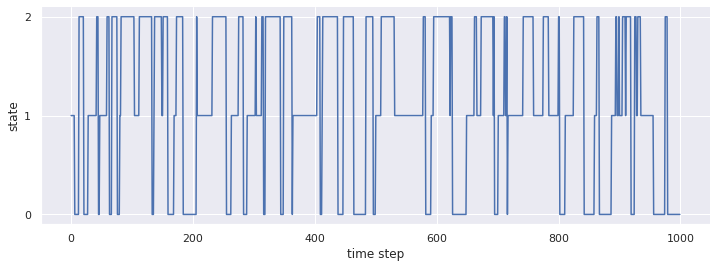

In [ ]:
states = markov_sequence(p_init, p_transition, sequence_length=1000)
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(states)
plt.xlabel("time step")
plt.ylabel("state")
plt.yticks([0, 1, 2])
sns.despine()

Bias-Variance trade off

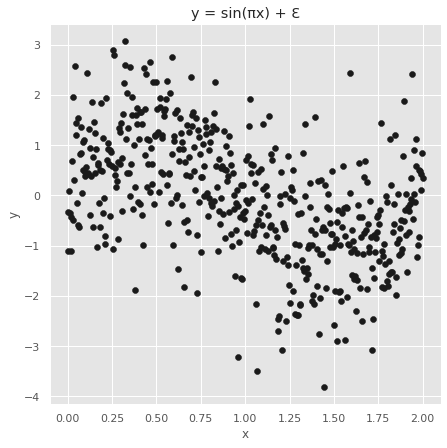

In [ ]:
plt.style.use('ggplot')


# number of observations
NUM_OBS = 500

# predictors
x = np.linspace(0, 2, num = NUM_OBS)
# noise
eps = np.random.normal(0, 1, NUM_OBS)
# outcome
y = np.sin(math.pi*x) + eps

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x, y, c = 'k')

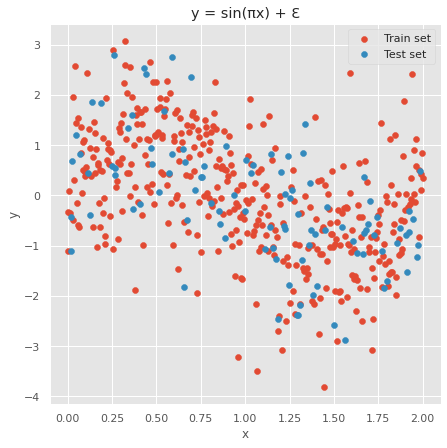

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly co

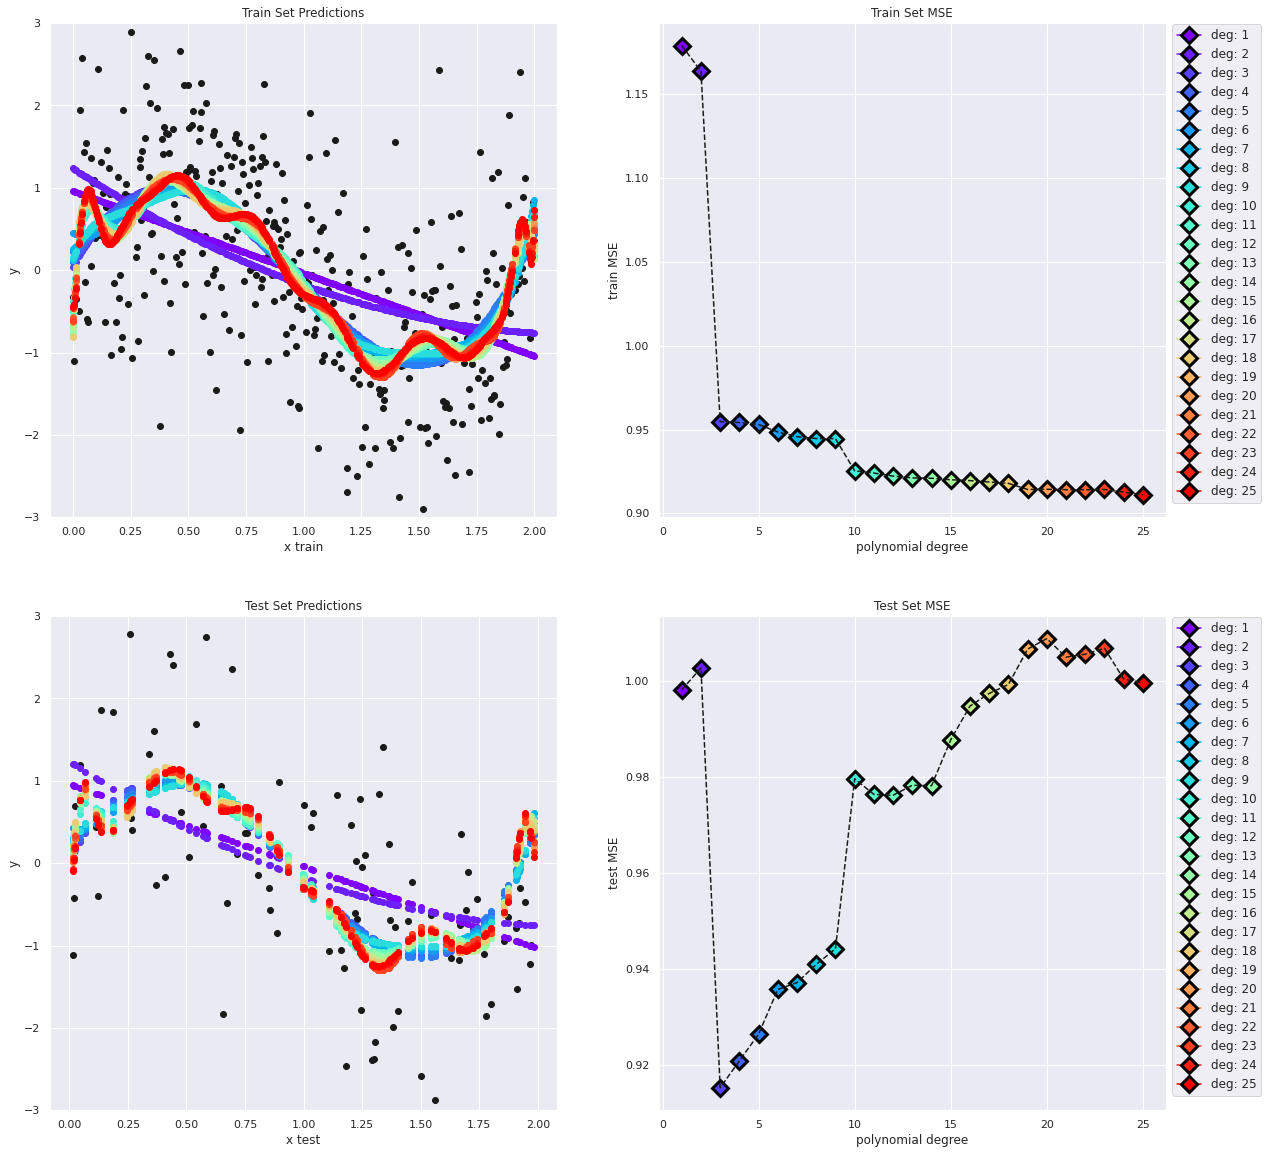

In [ ]:
# number of polynomial models to investigate
NUM_MODELS = 25

colors = iter(plt.cm.rainbow(np.linspace(0, 1, NUM_MODELS)))

fig, axs = plt.subplots(2, 2, figsize = (20,20))

axs[0, 0].set_title('Train Set Predictions')
axs[1, 0].set_title('Test Set Predictions')
axs[0, 1].set_title('Train Set MSE')
axs[1, 1].set_title('Test Set MSE')

axs[0, 0].set_xlabel("x train")
axs[0, 0].set_ylabel("y")
axs[0, 0].set_ylim([-3, 3])

axs[1, 0].set_xlabel("x test")
axs[1, 0].set_ylabel("y")
axs[1, 0].set_ylim([-3, 3])

axs[0, 1].set_xlabel("polynomial degree")
axs[0, 1].set_ylabel("train MSE")

axs[1, 1].set_xlabel("polynomial degree")
axs[1, 1].set_ylabel("test MSE")

axs[0,0].scatter(x_train, y_train, c = 'k', label = "y train")
axs[1,0].scatter(x_test, y_test, c = 'k', label = "y test")

train_mse = []
test_mse = []

for k in range(0, NUM_MODELS):

  c = next(colors)

  # k-th degree polynomial coefficients
  fit_coeff = np.polyfit(x_train, y_train, deg = k+1)

  # train and test k-th degree polynomial fit
  y_train_pred = np.polyval(fit_coeff, x_train)
  y_test_pred = np.polyval(fit_coeff, x_test)

  # plot train and test k-th degree polynomial fit
  axs[0,0].scatter(x_train,
                   y_train_pred,
                   color = c,
                   label = "deg: {}".format(k+1))
  
  axs[1,0].scatter(x_test,
                   y_test_pred,
                   color = c,
                   label = "deg: {}".format(k+1))

  # train and test MSE of k-th degree polynomial fit 
  iter_train_mse = mean_squared_error(y_train_pred, y_train)
  iter_test_mse = mean_squared_error(y_test_pred, y_test)

  train_mse.append(iter_train_mse)
  test_mse.append(iter_test_mse)

  # plot train and test MSE of k-th degree polynomial fit
  axs[0,1].plot(k+1,
                iter_train_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)
  
  axs[1,1].plot(k+1,
                iter_test_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)

# plot dashed line to interpolate MSE measures
axs[0,1].plot(range(1,NUM_MODELS+1), train_mse, 'k--')
axs[1,1].plot(range(1,NUM_MODELS+1), test_mse, 'k--')

# draw legends
axs[0,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})
axs[1,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})

In [ ]:
print("Best fit polynomial degree: ", test_mse.index(min(test_mse)))

Best fit polynomial degree:  2
